In [ ]:
!pip install python-docx 

     |████████████████████████████████| 5.6 MB 13.7 MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184508 sha256=a7bd2f2efea3511f3028f5f70edb619b82f7e2cc9a38c85b3fff24cf8c2d5d4f
  Stored in directory: /root/.cache/pip/wheels/f6/6f/b9/d798122a8b55b74ad30b5f52b01482169b445fbb84a11797a6
Successfully built python-docx


In [ ]:
!pip install pyLDAvis==2.1.2

     |████████████████████████████████| 1.6 MB 14.6 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=bad32c29815e7e41808fab5c0baaeb5d7333f3691b1f33c93fe99ae4c758aa2a
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis


In [ ]:
!pip install pyLDAvis.gensim==3.2.2

ERROR: Could not find a version that satisfies the requirement pyLDAvis.gensim==3.2.2 (from versions: none)
ERROR: No matching distribution found for pyLDAvis.gensim==3.2.2


In [ ]:
import os
from docx import Document
import re
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import gensim
from gensim import corpora
nltk.download('stopwords')
nltk.download('wordnet')

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
docs = []
path = "docs"
for dir in os.listdir(path):
    document = Document(os.path.join(path, dir))
    data = ''
    for para in document.paragraphs:
        data += " " + para.text
    docs.append(data)


In [ ]:
nlp = spacy.load('en_core_web_sm', disable = ['parser', 'ner'])
stop = stopwords.words('english')

def textCleaner(doc):
        doc = re.sub("[,.']", "", doc)
        doc = [token for token in doc.split(' ') if len(re.sub("[a-zA-Z]", "", token)) <= 0]
        doc = nlp(" ".join(doc))
        taglist = ['RB','RBR', 'RBS','JJR','JJ','JJS','NN','NNS','VB','VBG','VBP','VBN']
        poslist = ['ADJ','ADV','NOUN','VERB']
        doc = [token.lemma_.lower() for token in doc if token.tag_ in taglist and token.pos_ in poslist]
        doc = [token for token in doc if not token in stop and len(token)>2]
        return doc

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


In [ ]:
def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [ ]:
tokenized_docs = lemmatization(docs)
print(tokenized_docs[1])

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

['net', 'worth', 'important', 'amount', 'simple', 'term', 'net', 'worth', 'difference', 'asset', 'liability', 'positive', 'net', 'worth', 'liability', 'great', 'asset', 'negative', 'net', 'worth', 'net', 'worth', 'snapshot', 'financial', 'situation', 'point', 'time', 'net', 'worth', 'today', 'end', 'result', 'figure', 'helpful', 'example', 'call', 'track', 'job', 'confirmation', 'net', 'worth', 'time', 'meaningful', 'view', 'finance', 'net', 'worth', 'financial', 'report', 'card', 'current', 'financial', 'status', 'order', 'financial', 'goal', 'key', 'takeaways', 'net', 'worth', 'amount', 'asset', 'liability', 'asset', 'investment', 'bank', 'account', 'brokerage', 'account', 'retirement', 'fund', 'real', 'estate', 'personal', 'item', 'car', 'jewelry', 'liability', 'mortgage', 'loan', 'credit', 'card', 'debt', 'student', 'loan', 'other', 'debt', 'financial', 'situation', 'net', 'worth', 'current', 'financial', 'status', 'plan', 'future', 'net', 'worth', 'day', 'day', 'value', 'overall',

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


In [ ]:
dictionary = corpora.Dictionary(tokenized_docs)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_docs]

In [ ]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
lda_model.print_topics()

[(0,
  '0.026*"course" + 0.019*"interview" + 0.012*"programming" + 0.010*"sport" + 0.009*"good" + 0.009*"student" + 0.008*"question" + 0.008*"police" + 0.007*"year" + 0.007*"problem"'),
 (1,
  '0.020*"brain" + 0.014*"time" + 0.009*"good" + 0.008*"day" + 0.008*"people" + 0.007*"activity" + 0.007*"health" + 0.007*"way" + 0.006*"more" + 0.006*"hour"'),
 (2,
  '0.019*"customer" + 0.015*"school" + 0.013*"problem" + 0.011*"employee" + 0.010*"contribution" + 0.008*"year" + 0.008*"time" + 0.008*"people" + 0.008*"retirement" + 0.008*"political"'),
 (3,
  '0.000*"school" + 0.000*"time" + 0.000*"brain" + 0.000*"thing" + 0.000*"more" + 0.000*"political" + 0.000*"income" + 0.000*"people" + 0.000*"expense" + 0.000*"district"'),
 (4,
  '0.025*"expense" + 0.024*"money" + 0.018*"budget" + 0.017*"income" + 0.015*"time" + 0.013*"month" + 0.012*"personal" + 0.011*"spending" + 0.011*"financial" + 0.010*"more"'),
 (5,
  '0.000*"api" + 0.000*"datum" + 0.000*"people" + 0.000*"life" + 0.000*"time" + 0.000*"wor

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.098808 -0.009968       1        1  26.151316
2     -0.030083  0.035640       2        1  17.572487
7      0.187614  0.153924       3        1  15.322667
1      0.025237 -0.017656       4        1  11.368903
8     -0.113988  0.026625       5        1  10.433296
9     -0.115775  0.100743       6        1   8.572589
4     -0.135569  0.017411       7        1   7.871065
6      0.040707 -0.141528       8        1   2.668045
5      0.021524 -0.082596       9        1   0.019815
3      0.021524 -0.082595      10        1   0.019815, topic_info=           Term        Freq       Total Category  logprob  loglift
345      course  167.000000  167.000000  Default  30.0000  30.0000
61         debt   58.000000   58.000000  Default  29.0000  29.0000
626       datum   67.000000   67.000000  Default  28.0000  28.0000
192         net   44.000000   44.000000  Default  27.0000  27.0000
328       worth   51.000000   51.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
191        need    0.000861   14.955672  Topic10  -7.9305  -1.2365
118       great    0.000861   36.951390  Topic10  -7.9305  -2.1410
1102  candidate    0.000861   11.277315  Topic10  -7.9305  -0.9542
126      health    0.000861   17.829676  Topic10  -7.9305  -1.4123
90      example    0.000861   37.090534  Topic10  -7.9305  -2.1448

[638 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
427       1  0.333645      -
427       2  0.333645      -
427       3  0.033365      -
427       4  0.033365      -
427       5  0.133458      -
...     ...       ...    ...
329       5  0.035730   year
329       6  0.035730   year
329       7  0.089325   year
329       8  0.053595   year
1921      4  0.758124  young

[1131 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 8, 2, 9, 10, 5, 7, 6, 4])

In [ ]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_docs, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for


Perplexity:  -6.370413038388301

Coherence Score:  0.375744507101961


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_docs, start=2, limit=50, step=1)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

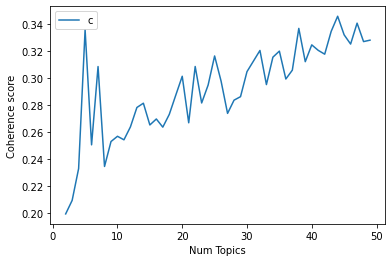

In [ ]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.1996
Num Topics = 3  has Coherence Value of 0.2096
Num Topics = 4  has Coherence Value of 0.2331
Num Topics = 5  has Coherence Value of 0.3356
Num Topics = 6  has Coherence Value of 0.2506
Num Topics = 7  has Coherence Value of 0.3084
Num Topics = 8  has Coherence Value of 0.2346
Num Topics = 9  has Coherence Value of 0.2531
Num Topics = 10  has Coherence Value of 0.2569
Num Topics = 11  has Coherence Value of 0.2543
Num Topics = 12  has Coherence Value of 0.2639
Num Topics = 13  has Coherence Value of 0.2782
Num Topics = 14  has Coherence Value of 0.2813
Num Topics = 15  has Coherence Value of 0.2653
Num Topics = 16  has Coherence Value of 0.2697
Num Topics = 17  has Coherence Value of 0.2637
Num Topics = 18  has Coherence Value of 0.2731
Num Topics = 19  has Coherence Value of 0.2873
Num Topics = 20  has Coherence Value of 0.3012
Num Topics = 21  has Coherence Value of 0.2669
Num Topics = 22  has Coherence Value of 0.3084
Num Topics = 23  has 